<a href="https://colab.research.google.com/github/milaml/VNP/blob/master/LabPrva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import requests

In [ ]:
from bs4 import BeautifulSoup
from IPython.display import HTML

In [ ]:
requests.packages.urllib3.disable_warnings()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
snapshot_url = 'https://mobelix.com.mk/mk/mobilni-telefoni'

In [ ]:
snapshot = requests.get(snapshot_url)
snapshot

<Response [200]>

In [ ]:
type(snapshot)

requests.models.Response

In [ ]:
raw_html = snapshot.text
print(raw_html)

<!doctype html>
<html lang="en">
  <head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <title>Мобилни телефони | Mobelix Premium Mobilara</title>
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    <meta name="title" content="Мобилни телефони | Mobelix Премиум Мобилара">
    <meta name="description" content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др.">        
    <meta name="keywords" content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni">
    <meta property='og:site_name' content='Mobelix Премиум Мобилара'/>
    <meta property='og:url' content='http://mobelix.com.mk/mk/mobilni-telefoni'/>
    <meta property=

In [ ]:
soup = BeautifulSoup(raw_html, 'html.parser')
soup.select_one('title')

<title>Мобилни телефони | Mobelix Premium Mobilara</title>

In [ ]:
phone_brands = soup.select('h5.mb-0')
phone_brands

[<h5 class="mb-0">Blackberry</h5>,
 <h5 class="mb-0">Samsung</h5>,
 <h5 class="mb-0">Samsung</h5>,
 <h5 class="mb-0">Apple</h5>,
 <h5 class="mb-0">Apple</h5>,
 <h5 class="mb-0">Apple</h5>,
 <h5 class="mb-0">Apple</h5>,
 <h5 class="mb-0">Apple</h5>,
 <h5 class="mb-0">Apple</h5>]

In [ ]:
type(phone_brands)

bs4.element.ResultSet

In [ ]:
brands = []
for tel in phone_brands:
  brands.append(tel.text)
  brands

In [ ]:
brands

['Blackberry',
 'Samsung',
 'Samsung',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple']

In [ ]:
phone_type = soup.select('h3.font-weight-normal')
phone_type

[<h3 class="h5 font-weight-normal">Porsche Design P9981</h3>,
 <h3 class="h5 font-weight-normal">Galaxy A03s 4/64GB</h3>,
 <h3 class="h5 font-weight-normal">Galaxy A04s 3/32GB</h3>,
 <h3 class="h5 font-weight-normal">iPhone 14 Pro Max 128GB E-SIM</h3>,
 <h3 class="h5 font-weight-normal">iPhone 14 Pro 512GB</h3>,
 <h3 class="h5 font-weight-normal">iPhone 14 Pro Max 512GB</h3>,
 <h3 class="h5 font-weight-normal">iPhone 14 Pro Max 1TB</h3>,
 <h3 class="h5 font-weight-normal">iPhone 14 Pro 128GB E-SIM</h3>,
 <h3 class="h5 font-weight-normal">iPhone 13 Mini 256GB</h3>]

In [ ]:
type = []
for tel in phone_type:
  type.append(tel.text)


In [ ]:
type

['Porsche Design P9981',
 'Galaxy A03s 4/64GB',
 'Galaxy A04s 3/32GB',
 'iPhone 14 Pro Max 128GB E-SIM',
 'iPhone 14 Pro 512GB',
 'iPhone 14 Pro Max 512GB',
 'iPhone 14 Pro Max 1TB',
 'iPhone 14 Pro 128GB E-SIM',
 'iPhone 13 Mini 256GB']

In [ ]:
phone_price = soup.select('p.price')
phone_price

[<p class="h5 price">19,000.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">9,200.00</del><br/>8,300.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">10,500.00</del><br/>8,300.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">67,600.00</del><br/>61,500.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">94,100.00</del><br/>89,200.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">80,000.00</del><br/>78,100.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">116,900.00</del><br/>98,400.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">58,500.00</del><br/>55,300.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">47,990.00</del><br/>46,800.00 ден</p>]

In [ ]:
prices = []

for tel in phone_price:
  if (len(tel.contents) == 1):
     prices.append(tel.contents[0])
  else:
    prices.append(tel.contents[2])


In [ ]:
prices

['19,000.00 ден',
 '8,300.00 ден',
 '8,300.00 ден',
 '61,500.00 ден',
 '89,200.00 ден',
 '78,100.00 ден',
 '98,400.00 ден',
 '55,300.00 ден',
 '46,800.00 ден']

In [ ]:
intCena = []

for cena in prices:
    cena = cena.split(' ')[0]
    cena = cena.replace(',', '')
    intCena.append(cena)
new_Prices = []
for cena in intCena:
    cena = cena.split('.')[0]

    new_Prices.append(cena)

new_Prices

['19000', '8300', '8300', '61500', '89200', '78100', '98400', '55300', '46800']

In [ ]:
matrix=[]

for i in range(0, len(brands)):
  matrix.append([brands[i],type[i],new_Prices[i]])

In [ ]:
df = pd.DataFrame(np.array(matrix),columns=['BRANDS', 'TYPE', 'PRICES'])
df

,BRANDS,TYPE,PRICES
0,Blackberry,Porsche Design P9981,19000
1,Samsung,Galaxy A03s 4/64GB,8300
2,Samsung,Galaxy A04s 3/32GB,8300
3,Apple,iPhone 14 Pro Max 128GB E-SIM,61500
4,Apple,iPhone 14 Pro 512GB,89200
5,Apple,iPhone 14 Pro Max 512GB,78100
6,Apple,iPhone 14 Pro Max 1TB,98400
7,Apple,iPhone 14 Pro 128GB E-SIM,55300
8,Apple,iPhone 13 Mini 256GB,46800


In [ ]:
len(brands) == len(type) == len(new_Prices)

True

In [ ]:
df.to_csv('/content/drive/MyDrive/Lab1.ipyn', index=False )

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Lab1.ipyn' )

In [ ]:
df['PRICES'].mean()


51655.555555555555

In [ ]:
df['PRICES'].median()

55300.0

In [ ]:
df['PRICES'].min()

8300

In [ ]:
df['PRICES'].max()

98400

In [ ]:
df['PRICES'].std()

34010.112875110804

<Axes: >

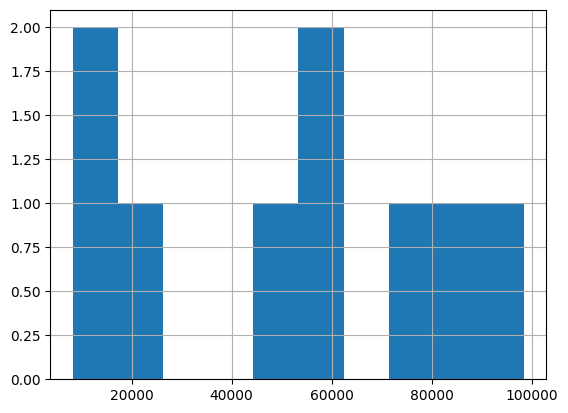

In [ ]:
df['PRICES'].hist()

<Axes: >

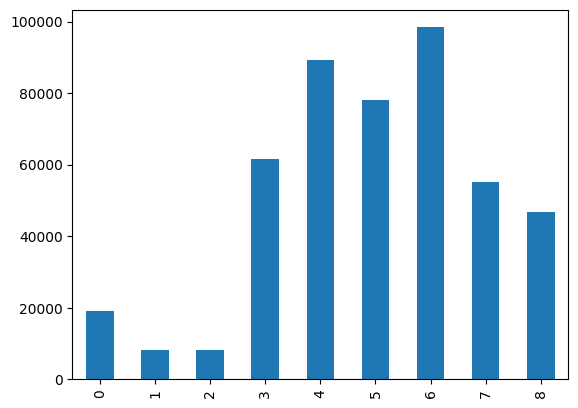

In [ ]:
df['PRICES'].plot.bar()